
#### Transform the feature of train dataset (yah to train) for both gas and Electricity

### Todo: metrics visulization, transformation 
##### One-hot encoding: a process of converting categorical variables into binary vectors, where each category becomes a separate binary vector.
- A -> [1,0,0]
- B -> [0,1,0]
- C -> [0,0,1]
##### Label encoding is a process of assigning a unique integer value to each category in a categorical column.
- A -> 0
- B -> 1
- C -> 2
--> todo : 
- data visualization
- categorical : label encoding
- for zipcode: one-hot encoding 
- ordinal data
- data normalization 
#### While Nominal Data is classified without any intrinsic ordering or rank, Ordinal Data has some predetermined or natural order. Nominal data is qualitative or categorical data, while Ordinal data is considered “in-between” qualitative and quantitative data
--> clean, transform, split, model 
- fe>>model selection>>training>>validate
- Correlation between electricity consumption and other variables:
- annual_consumption by street
- annual_consumption by zip code (lam sao ta)
- A bar chart/line graph could be used to show the adoption rate of smart meters over time.
- we can consider smarmeter_perc as categorical dtypes
--> transform by each column

### --> Observations: 
- considered net_manager, purchase_area, street and city are categorical column (we have to train by year and there are differences companies and purchase area)
- Since zipcode_from and zipcode_to contains unique zipcode I will work with that later
- One more categorical column is type_of_connection, check later
- the zipcode will be transfered later, so replace NaN value by Unknown

- According to Noord-Brabant, The "s-" at the beginning of some Dutch city names is a contraction of the Dutch word "des" which means "the" in English. It is a remnant of older Dutch grammar and is used to indicate possession or association with a particular noble family or lord. In the case of 's-Hertogenbosch, it refers to the Duke of Brabant
https://www.eur.nl/sites/corporate/files/Thesis_Straatnamen_Kooloos.pdf
- However, '-' and " ' " should be replaced when it turns to feature extraction --> replace by whitespace 
- the ```STANDAARDDEVIATIE``` column is not in the description --> remove
#### The id columns is currently id, we should change it into net_manager name for matching the given dataset 
##### Based on information from netbeheer, those id stands for Stedin B.V company. -> Apply company name to the column 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Etrain = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/As2-EEET574/Merged_dataset/Electricity/E-train.csv')
Etrain.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25748\2637508246.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Etrain = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/As2-EEET574/Merged_dataset/Electricity/E-train.csv')


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year,Type,Company
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.0,2018,Electricity,Coteq
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.0,2018,Electricity,Coteq
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.0,2018,Electricity,Coteq
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.0,2018,Electricity,Coteq
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.0,2018,Electricity,Coteq


In [3]:
Etrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176807 entries, 0 to 176806
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   176807 non-null  object 
 1   purchase_area                 176807 non-null  object 
 2   street                        176807 non-null  object 
 3   zipcode_from                  176807 non-null  object 
 4   zipcode_to                    176807 non-null  object 
 5   city                          176807 non-null  object 
 6   num_connections               176807 non-null  int64  
 7   delivery_perc                 176807 non-null  float64
 8   perc_of_active_connections    176807 non-null  float64
 9   type_conn_perc                176807 non-null  float64
 10  type_of_connection            176807 non-null  object 
 11  annual_consume                176807 non-null  float64
 12  annual_consume_lowtarif_perc  176807 non-nul

# The target variable is annual_consume, so we should drop unsuitable column 

In [4]:
# drop zipcode and company colunm
Etrain = Etrain.drop(['zipcode_from','zipcode_to','Company','Type','Year'],axis=1)
Etrain.head()

,net_manager,purchase_area,street,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.0
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.0
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.0
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.0
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_25748\4014349577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Etrain.corr()


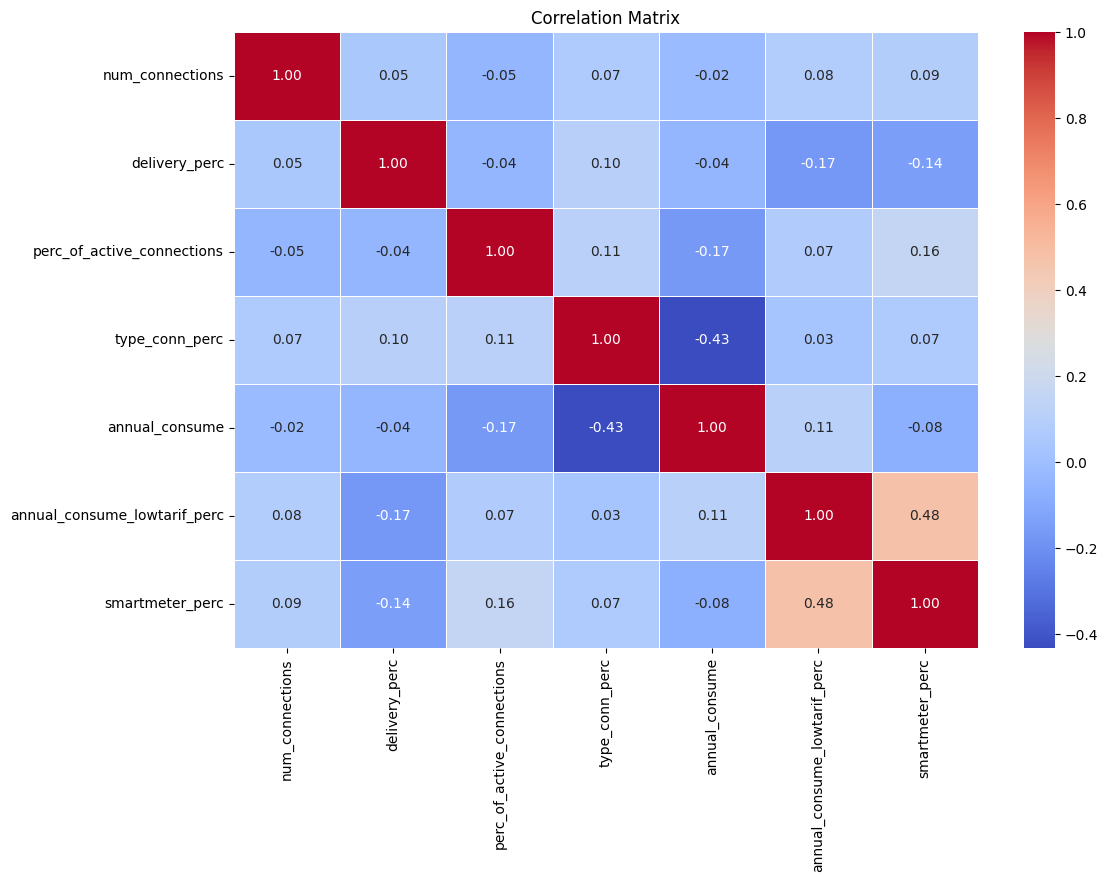

In [5]:
correlation_matrix = Etrain.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# # aplot between annual_consume and annual_consume_lowtarif_perc
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='annual_consume', y='annual_consume_lowtarif_perc', data=Etrain)
# plt.xlabel('annual_consume')
# plt.ylabel('annual_consume_lowtarif_perc')
# plt.title('annual_consume vs annual_consume_lowtarif_perc')
# plt.show()


- There's a general trend of increasing annual consumption with increasing annual consumption with a low tariff percentage

<AxesSubplot: >

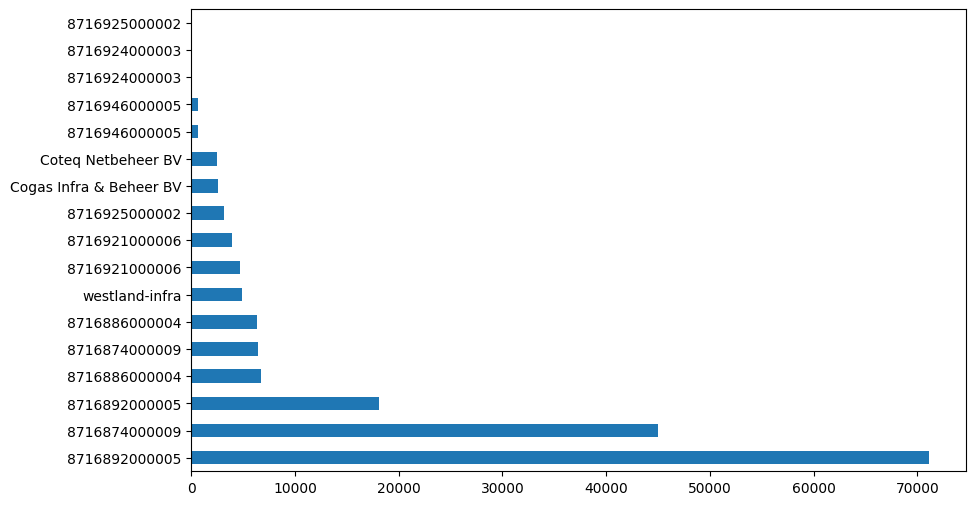

In [7]:
Etrain['net_manager'].value_counts().plot(kind='barh', figsize=(10, 6))

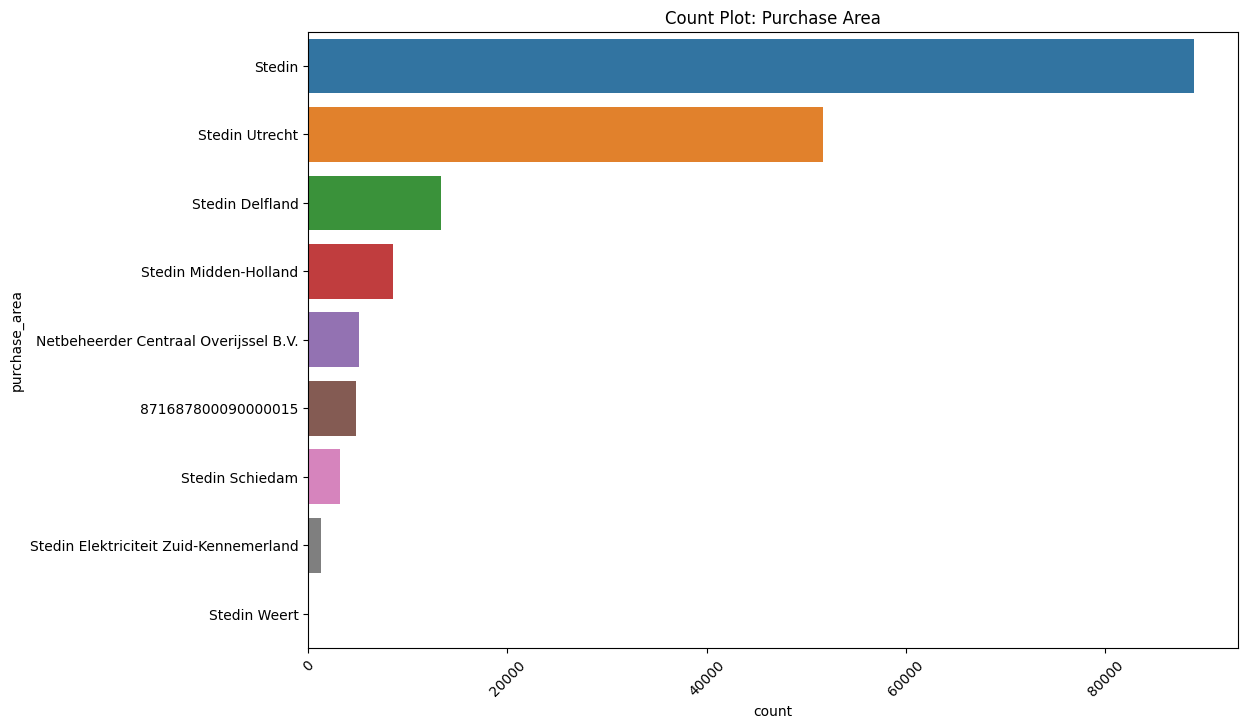

In [8]:
# countplot of purchase_area
plt.figure(figsize=(12, 8))
sns.countplot(y='purchase_area', data=Etrain, order=Etrain['purchase_area'].value_counts().index)
plt.title('Count Plot: Purchase Area')
plt.xticks(rotation=45)
plt.show()


In [9]:
# drop rows where purchase_area is is stedin weert
Etrain = Etrain[Etrain['purchase_area'] != 'Stedin Weert']

In [10]:
Etrain = Etrain[~Etrain['net_manager'].isin([8716925000002, 8716924000003])]


In [11]:
# # Create box plots for selected features
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='type_of_connection', y='annual_consume', data=Etrain)
# plt.title('Box Plot: Type of Connection vs. Annual Consume')
# plt.show()


... dirty vcl

In [12]:
# the annual_consume is regression problem, so I will split  the data into 2 parts: train and test
Xetrain = Etrain.drop(['annual_consume'], axis=1)
Yetrain = Etrain['annual_consume']

In [13]:
numerical_columns = Xetrain.select_dtypes(include=['float64', 'int64']).columns

In [14]:
# import seaborn as sns
# # Create a pair plot for selected numerical features
# sns.pairplot(Etrain[numerical_columns],size = 2.5)
# plt.show()

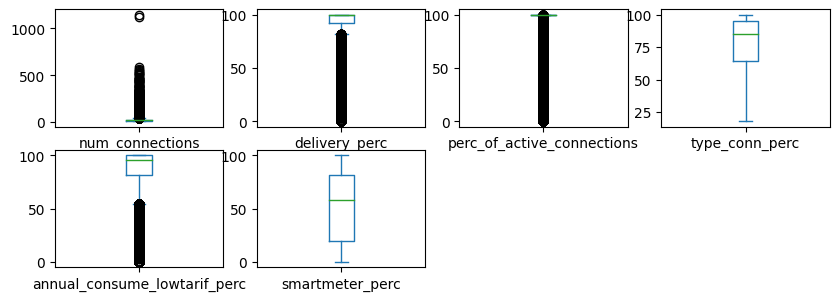

In [15]:
# plot the distribution of numerical variable 
Xetrain.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (10, 7))
plt.show()

In [16]:
from scipy.stats import skew

def check_skewness(data):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    skewness_result = pd.DataFrame({'Feature': numerical_columns, 'Skewness': [skew(data[col]) for col in numerical_columns]})
    return skewness_result
skewness_results = check_skewness(Xetrain)

# Display the results
print(skewness_results)


                        Feature  Skewness
0               num_connections  9.293289
1                 delivery_perc -3.813392
2    perc_of_active_connections -8.444499
3                type_conn_perc -0.694957
4  annual_consume_lowtarif_perc -1.868006
5               smartmeter_perc -0.176575


### Hmm 
--> Exponential Transformation for num_connection
- --> that ra cu dung boxcox het cung ngon do no hop cho positive dt

In [17]:
import numpy as np
from scipy.stats import boxcox
# Exponential transformation for num_connection
Xetrain['num_connections'] = np.log1p(Xetrain['num_connections'])
#boxcox transformation for delivery_perc
Xetrain['delivery_perc'], _ = boxcox(Xetrain['delivery_perc'] + 1)
Xetrain['perc_of_active_connections'], _ = boxcox(Xetrain['perc_of_active_connections'] + 1)
Xetrain['annual_consume_lowtarif_perc'] = np.sqrt(Xetrain['annual_consume_lowtarif_perc'])

- hmm negative regression problem 

In [18]:
from scipy.stats import skew
#print skewness of each column 
skewness_results = check_skewness(Xetrain)
print(skewness_results)

                        Feature  Skewness
0               num_connections  1.091165
1                 delivery_perc -0.862277
2    perc_of_active_connections -2.221891
3                type_conn_perc -0.694957
4  annual_consume_lowtarif_perc -2.597658
5               smartmeter_perc -0.176575


In [19]:
# import numpy as np
# from scipy.stats import boxcox

# def apply_skew_transformations(df, columns):
#     transformed_columns = []

#     for column in columns:
#         if df[column].skew() > 1:
#             # log transformation for positive skewness
#             transformed_column = f'log_{column}'
#             df[transformed_column] = np.log1p(df[column])
#         elif df[column].skew() < -1:
#             # suqare root transformation for negative skewness
#             transformed_column = f'sqrt_{column}'
#             df[transformed_column] = np.sqrt(-df[column])
#         else:
#             # Apply Box-Cox transformation for other cases
#             transformed_column = f'boxcox_{column}'
#             df[transformed_column], _ = boxcox(df[column] + 1)  # Add a constant to handle non-positive values

#         transformed_columns.append(transformed_column)

#     return df, transformed_columns

# columns_to_transform = ['num_connections', 'delivery_perc', 'perc_of_active_connections',
#                          'annual_consume_lowtarif_perc', 'smartmeter_perc']

# Xetrain_transformed, transformed_columns = apply_skew_transformations(Xetrain, columns_to_transform)
# print(f"Transformed Columns: {', '.join(transformed_columns)}")


In [20]:
# def plot_distributions(data):
#     numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
#     fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4 * len(numerical_columns)))
#     for i, column in enumerate(numerical_columns):
#     # Plot distribution
#         sns.histplot(data[column], bins=30, kde=True, ax=axes[i], color='skyblue')
#         axes[i].set_title(f'Distribution of {column}')
#         axes[i].set_xlabel('')
#         axes[i].set_ylabel('')
    
#     # Set common xlabel
#     plt.xlabel('Feature Values')
#     plt.tight_layout()
#     plt.show()
# plot_distributions(Xetrain)


In [21]:
from scipy.stats import boxcox
Xetrain['log_num_connections'] = np.log1p(Xetrain['num_connections'])
Xetrain['sqrt_delivery_perc'] = np.sqrt(Xetrain['delivery_perc'])
Xetrain['boxcox_perc_of_active_connections'], _ = boxcox(Xetrain['perc_of_active_connections'] + 1)
Xetrain['sqrt_annual_consume_lowtarif_perc'] = np.sqrt(Xetrain['annual_consume_lowtarif_perc'])



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:922: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


### Numerical encoding


#### Now, I will do some categorical encoding 
- for zipcode --> one-hot encoding --> concatenate and create dummies variable 
- for 

In [22]:
print(Xetrain['net_manager'].value_counts())  

8716892000005              71172
8716874000009              45016
8716892000005              18094
8716886000004               6710
8716874000009               6419
8716886000004               6363
westland-infra              4842
8716921000006               4703
8716921000006               3925
Cogas Infra & Beheer BV     2563
Coteq Netbeheer BV          2503
8716946000005                670
8716946000005                661
8716925000002                  4
Name: net_manager, dtype: int64


In [23]:
print(Xetrain['purchase_area'].value_counts())

Stedin                                    88881
Stedin Utrecht                            51668
Stedin Delfland                           13330
Stedin Midden-Holland                      8524
Netbeheerder Centraal Overijssel B.V.      5066
871687800090000015                         4842
Stedin Elektriciteit Zuid-Kennemerland     1330
Stedin Schiedam                               4
Name: purchase_area, dtype: int64


### for handling those thing, I have to split my dataset again dcm 

In [24]:
Xetrain['net_manager_numerical'] = pd.to_numeric(Xetrain['net_manager'], errors='coerce')
Xetrain['net_manager_categorical'] = Xetrain['net_manager'].where(Xetrain['net_manager_numerical'].isna())
Xetrain['purchase_area_numerical'] = pd.to_numeric(Xetrain['purchase_area'], errors='coerce')
Xetrain['purchase_area_categorical'] = Xetrain['purchase_area'].where(Xetrain['Purchase_area_numerical'].isna())
XetrainEncode = pd.get_dummies(Xetrain, columns=['net_manager_categorical', 'purchase_area_categorical', 'type_of_connection'], drop_first=True)


KeyError: 'Purchase_area_numerical'

In [ ]:
XetrainEncode = XetrainEncode.drop(['net_manager', 'purchase_area', 'net_manager_numerical', 'purchase_area_numerical'], axis=1)
XetrainEncode

,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume_lowtarif_perc,smartmeter_perc,...,purchase_area_categorical_STEDIN WEERT,type_of_connection_1X35,type_of_connection_1X50,type_of_connection_1X6,type_of_connection_3X25,type_of_connection_3X35,type_of_connection_3X50,type_of_connection_3X63,type_of_connection_3X80,type_of_connection_OBK
0,DORPSSTRAAT,7468CP,7471AA,ENTER,19,89.47,94.74,89.0,89.47,0.0,...,0,1,0,0,0,0,0,0,0,0
1,DE STOEVELAAR,7471AB,7471AB,GOOR,37,100.00,100.00,86.0,94.59,0.0,...,0,1,0,0,0,0,0,0,0,0
2,DE STOEVELAAR,7471AC,7471AC,GOOR,16,100.00,100.00,100.0,100.00,0.0,...,0,1,0,0,0,0,0,0,0,0
3,DE STOEVELAAR,7471AD,7471AE,GOOR,25,92.00,84.00,44.0,92.00,0.0,...,0,1,0,0,0,0,0,0,0,0
4,KERKSTRAAT,7471AG,7471AG,GOOR,14,85.71,100.00,36.0,92.86,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176802,IN DE BALIJE,3155XA,3155XA,MAASLAND,14,100.00,100.00,100.0,100.00,0.0,...,0,0,0,0,1,0,0,0,0,0
176803,KONINGIN JULIANAWEG,3155XB,3155XB,MAASLAND,14,100.00,100.00,86.0,92.86,0.0,...,0,0,0,0,1,0,0,0,0,0
176804,KONINGIN JULIANAWEG,3155XC,3155XD,MAASLAND,29,89.66,100.00,86.0,86.21,0.0,...,0,0,0,0,1,0,0,0,0,0
176805,KONINGIN JULIANAWEG,3155XE,3155XH,MAASLAND,28,100.00,100.00,100.0,100.00,0.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_encoded = pd.concat([Xetrain, pd.get_dummies(Xetrain['zipcode_from'], prefix='zipcode_from'), 
                        pd.get_dummies(Xetrain['zipcode_to'], prefix='zipcode_to')], axis=1)
# df_encoded = df_encoded.drop(['zipcode_from', 'zipcode_to'], axis=1)
